In [1]:
import numpy as np, pandas as pd, sklearn, matplotlib.pyplot as plt, seaborn as sns


In [2]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(columns = 'species')
y = df['species']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.32,
                                                random_state = 23,
                                                stratify= y)

xTrain.shape, xTest.shape, len(yTrain), len(yTest)

((102, 4), (48, 4), 102, 48)

In [7]:
# scaling & transformation
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PowerTransformer

# column transformer, pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
# pipeline

irisPipeLine = Pipeline(steps = [
    ('scaling', RobustScaler()),
    ('transformation', PowerTransformer()),
    ('estimator', KNeighborsClassifier())
])

In [9]:
irisPipeLine.fit(xTrain, yTrain)

Pipeline(steps=[('scaling', RobustScaler()),
                ('transformation', PowerTransformer()),
                ('estimator', KNeighborsClassifier())])

In [10]:
yTrainPred, yTestPred = irisPipeLine.predict(xTrain), irisPipeLine.predict(xTest)

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [12]:
cmTrain, cmTest = confusion_matrix(yTrain, yTrainPred), confusion_matrix(yTest, yTestPred)

In [14]:
# ConfusionMatrixDisplay

cmTrainDisplay, cmTestDisplay = ConfusionMatrixDisplay(cmTrain, display_labels = irisPipeLine.classes_), ConfusionMatrixDisplay(cmTest, display_labels = irisPipeLine.classes_)

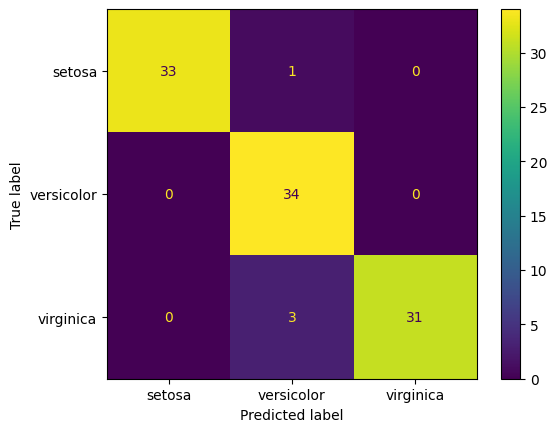

In [15]:
cmTrainDisplay.plot()

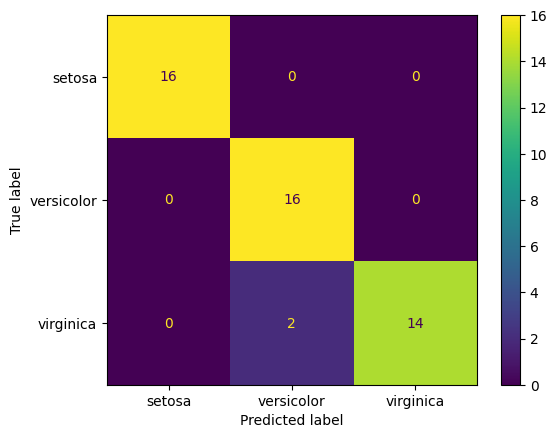

In [16]:
cmTestDisplay.plot()

In [19]:
crTrain = classification_report(yTrain, yTrainPred, labels = irisPipeLine.classes_ )
print(crTrain)

              precision    recall  f1-score   support

      setosa       1.00      0.97      0.99        34
  versicolor       0.89      1.00      0.94        34
   virginica       1.00      0.91      0.95        34

    accuracy                           0.96       102
   macro avg       0.96      0.96      0.96       102
weighted avg       0.96      0.96      0.96       102



In [20]:
crTest = classification_report(yTest, yTestPred, labels = irisPipeLine.classes_ )
print(crTest)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.89      1.00      0.94        16
   virginica       1.00      0.88      0.93        16

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [26]:
# gridsearchCv  to tune hyperparameters of our estimator
from sklearn.model_selection import GridSearchCV

hyperParameterGrid = {'estimator__n_neighbors': np.arange(5,11),
                      'estimator__weights' : ['uniform', 'distance'],
                      'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


irisGridSearchCV = GridSearchCV(irisPipeLine,
                                hyperParameterGrid,
                                cv = 5,
                                #scoring = 'f1',
                                refit = True,
                                verbose = 2
                                )

In [27]:
irisGridSearchCV.fit(xTrain, yTrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=uniform; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=uniform; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=uniform; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=uniform; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=uniform; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=distance; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=distance; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, estimator__weights=distance; total time=   0.0s
[CV] END estimator__algorithm=auto, estimator__n_neighbors=5, e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', RobustScaler()),
                                       ('transformation', PowerTransformer()),
                                       ('estimator', KNeighborsClassifier())]),
             param_grid={'estimator__algorithm': ['auto', 'ball_tree',
                                                  'kd_tree', 'brute'],
                         'estimator__n_neighbors': array([ 5,  6,  7,  8,  9, 10]),
                         'estimator__weights': ['uniform', 'distance']},
             verbose=2)

In [28]:
irisGridSearchCV.best_params_

{'estimator__algorithm': 'auto',
 'estimator__n_neighbors': 6,
 'estimator__weights': 'uniform'}

In [32]:
irisGridDf = pd.DataFrame(irisGridSearchCV.cv_results_)
irisGridDf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__algorithm,param_estimator__n_neighbors,param_estimator__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013403,0.002142,0.005086,0.000314,auto,5,uniform,"{'estimator__algorithm': 'auto', 'estimator__n...",1.0,0.952381,0.95,0.95,0.95,0.960476,0.019783,33
1,0.012915,0.000845,0.003425,0.000633,auto,5,distance,"{'estimator__algorithm': 'auto', 'estimator__n...",1.0,0.952381,0.95,0.95,0.95,0.960476,0.019783,33
2,0.014747,0.004010,0.006587,0.001437,auto,6,uniform,"{'estimator__algorithm': 'auto', 'estimator__n...",1.0,0.952381,1.00,0.95,0.95,0.970476,0.024122,1
3,0.012033,0.000754,0.003199,0.000301,auto,6,distance,"{'estimator__algorithm': 'auto', 'estimator__n...",1.0,0.952381,0.95,0.95,0.95,0.960476,0.019783,33
4,0.012318,0.000560,0.005523,0.001496,auto,7,uniform,"{'estimator__algorithm': 'auto', 'estimator__n...",1.0,0.952381,1.00,0.95,0.95,0.970476,0.024122,1


In [31]:
yTestGridSearchCvPred = irisGridSearchCV.predict(xTest)

In [33]:
crTestGrid = classification_report(yTest, yTestGridSearchCvPred, labels = irisPipeLine.classes_ )
print(crTestGrid)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.84      1.00      0.91        16
   virginica       1.00      0.81      0.90        16

    accuracy                           0.94        48
   macro avg       0.95      0.94      0.94        48
weighted avg       0.95      0.94      0.94        48



In [35]:
# cont col transformer

irisPreProcess1 = Pipeline(steps = [
    ('scaling', RobustScaler()),
    ('transformation', PowerTransformer())
])

In [37]:
knc, dtc = KNeighborsClassifier(), DecisionTreeClassifier()

In [38]:
irisMultiEst = Pipeline(steps = [
    ('preprocess',irisPreProcess1),
    ('estimators', knc)
])

In [51]:
kncParams = {'estimators__n_neighbors': np.arange(5,11),
             'estimators__weights' : ['uniform', 'distance'],
             'estimators__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'estimators': [knc]
             }


dtcParams = {'estimators__criterion' : ["gini", "entropy", "log_loss"],
             'estimators': [dtc]}


In [52]:
multiHyperGrid = [kncParams, dtcParams]

In [53]:
irisGridSearchCVMultiEstimators = GridSearchCV(irisMultiEst,
                                multiHyperGrid,
                                cv = 5,
                                #scoring = 'f1',
                                refit = True,
                                verbose = 2
                                )

In [54]:
irisGridSearchCVMultiEstimators.fit(xTrain, yTrain)

Fitting 5 folds for each of 51 candidates, totalling 255 fits
[CV] END estimators=KNeighborsClassifier(n_neighbors=6), estimators__algorithm=auto, estimators__n_neighbors=5, estimators__weights=uniform; total time=   0.1s
[CV] END estimators=KNeighborsClassifier(n_neighbors=6), estimators__algorithm=auto, estimators__n_neighbors=5, estimators__weights=uniform; total time=   0.0s
[CV] END estimators=KNeighborsClassifier(n_neighbors=6), estimators__algorithm=auto, estimators__n_neighbors=5, estimators__weights=uniform; total time=   0.0s
[CV] END estimators=KNeighborsClassifier(n_neighbors=6), estimators__algorithm=auto, estimators__n_neighbors=5, estimators__weights=uniform; total time=   0.0s
[CV] END estimators=KNeighborsClassifier(n_neighbors=6), estimators__algorithm=auto, estimators__n_neighbors=5, estimators__weights=uniform; total time=   0.0s
[CV] END estimators=KNeighborsClassifier(n_neighbors=6), estimators__algorithm=auto, estimators__n_neighbors=5, estimators__weights=distan

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('scaling',
                                                         RobustScaler()),
                                                        ('transformation',
                                                         PowerTransformer())])),
                                       ('estimators',
                                        KNeighborsClassifier(n_neighbors=6))]),
             param_grid=[{'estimators': [KNeighborsClassifier(n_neighbors=6)],
                          'estimators__algorithm': ['auto', 'ball_tree',
                                                    'kd_tree', 'brute'],
                          'estimators__n_neighbors': array([ 5,  6,  7,  8,  9, 10]),
                          'estimators__weights': ['uniform', 'distance']},
                         {'estimators': [DecisionTreeClassifier()],
                          'estimators__criterion': ['gini', 'entropy',
                                                    'log_loss']}],
             verbose=2)